<a href="https://colab.research.google.com/github/peleal/Deliverable-2/blob/main/Deliverable_2_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
# Pandas e Numpy
import pandas as pd
import numpy as np
# Plotly para gerar graficos dos mapas
import plotly.express as px
# Pandas_Profiling para gerar dashboards
from pandas_profiling import ProfileReport
#Matplotlib
import matplotlib.pyplot as plt
#Seaborn
import seaborn as sns
#Datetime
from datetime import datetime, timedelta

In [62]:
def fahr_to_celsius(temp_fahr):
    """Convert Fahrenheit to Celsius
    Return Celsius conversion of input"""
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

In [19]:
from google.colab import files
uploaded = files.upload()

Saving Walmart.csv to Walmart (2).csv


In [63]:
arquivo = 'Walmart.csv'
df = pd.read_csv(arquivo)

In [64]:
df_sub = df.copy()

In [65]:
df_sub['Weekly_Sales'] = df_sub['Weekly_Sales'].astype('float64')
#df_sub['Date'] = df_sub['Date'].astype('datetime64[ns]')

In [66]:
fahr_to_celsius(df_sub['Temperature'])
df_sub["temperature_Celsius"] = fahr_to_celsius(df_sub['Temperature'])

In [67]:
df_holiday = df_sub.loc[df_sub['Holiday_Flag'] == 1]

In [68]:
df_sub_1 = df_sub.loc[df['Store']==1].copy()

In [ ]:
f, ax = plt.subplots(figsize=(20, 14))
fig=sns.heatmap(df_sub_t.corr(), annot=True,annot_kws={'size': 10}, linewidths=.6, ax=ax)
fig.figure

In [69]:
df_sub['Date'] = pd.to_datetime(df_sub['Date'], dayfirst=True)
df_sub.sort_values("Date")

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,temperature_Celsius
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5.727778
1287,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765,12.411111
5148,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554,7.761111
2288,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548,-4.938889
4147,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324,3.916667
...,...,...,...,...,...,...,...,...,...
3574,25,2012-10-26,688940.94,0,56.69,3.882,216.151590,7.293,13.716667
714,5,2012-10-26,319550.77,0,71.70,3.506,224.037814,5.422,22.055556
5719,40,2012-10-26,921264.52,0,49.65,3.917,138.728161,4.145,9.805556
2573,18,2012-10-26,1127516.25,0,56.09,3.917,138.728161,8.243,13.383333


In [70]:
df_sub['Year-Week'] = df_sub['Date'].dt.strftime('%Y-%U')
df_sub = df_sub.groupby(by=['Year-Week', 'Store']).sum()
df_sub = df_sub.sort_values(["Year-Week", "Weekly_Sales"], ascending = (True, False))

In [71]:
## Primeiro Insight
df_sub_t = df_sub.groupby(by=['Store']).mean()
df_sub_t.head(45)

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,temperature_Celsius
Store,,,,,,,
1,1.555264e+06,0.06993,68.306783,3.219699,215.996892,7.610420,20.170435
2,1.925751e+06,0.06993,68.216364,3.219699,215.646311,7.623846,20.120202
3,4.027044e+05,0.06993,71.434196,3.219699,219.391531,7.176986,21.907887
4,2.094713e+06,0.06993,62.253357,3.216972,128.679669,5.964692,16.807420
5,3.180118e+05,0.06993,69.410140,3.219699,216.565581,6.295406,20.783411
6,1.564728e+06,0.06993,69.700000,3.219699,217.553197,6.606902,20.944444
7,5.706173e+05,0.06993,39.720280,3.241559,193.664243,8.585734,4.289044
8,9.087495e+05,0.06993,62.513986,3.219699,219.439026,6.091846,16.952214
9,5.439806e+05,0.06993,67.775175,3.219699,219.626689,6.099881,19.875097


In [ ]:
df_sub_t.plot(x='Holiday_Flag', y='Weekly_Sales', kind='bar')

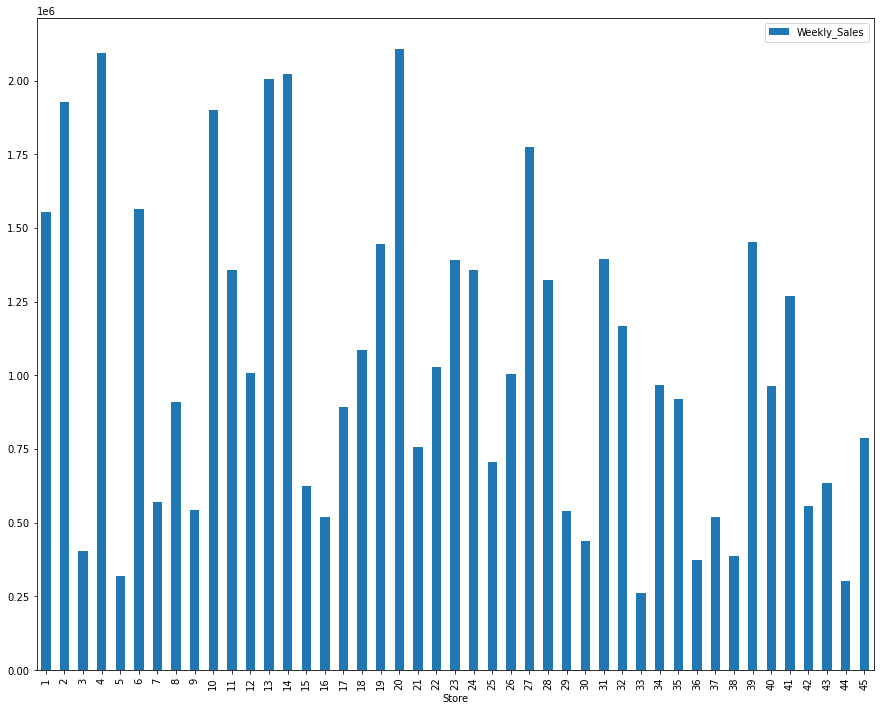

In [72]:
figura = df_sub_t.plot(y='Weekly_Sales', kind='bar', figsize=(15, 12))

In [ ]:
store = 0
data = 0
valor = 0
df_lucro = pd.DataFrame()
df_prej = pd.DataFrame()
df_igual = pd.DataFrame()

for i in range(len(df_sub)):
    if store != df_sub.iloc[i,0]:
        store = 0

    if store == 0:
        store = df_sub.iloc[i,0]
        data = df_sub.iloc[i,1]
        valor = df_sub.iloc[i,2]

In [ ]:

    elif casa_id == df_sub.iloc[i,0]:
        if data >  df_sub.iloc[i,1]:
            diff = valor - df_sub.iloc[i,2]
            df_sub.loc[df_sub.id == casa_id,'diff'] = diff
            per = ((valor / (df_sub.iloc[i,2])) - 1) * 100
            df_sub.loc[df_sub.id == casa_id,'per'] = per
        else:
            diff = df_sub.iloc[i,2] - valor
            df_sub.loc[df_sub.id == casa_id,'diff'] = diff
            per = (((df_sub.iloc[i,2]) / valor) - 1) * 100
            df_sub.loc[df_sub.id == casa_id,'per'] = per

df_lucro = df_sub.loc[df_sub['diff'] > 0]
df_prej = df_sub.loc[df_sub['diff']  < 0]
df_igual = df_sub.loc[df_sub['diff']  == 0]